**In this Notebook we work on Titanic passengers database and make predictions on their survival. We use scikit-learn package, please feel free to learn classification in scikit from here https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
Most of the functions needed for the homework are in the notebook, please look at the arguments for each function and play with them to improve your understanding**



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


**Explore the dataset by looking at the features. For improving the accuracy you can play with features as well, if you feel some of the features are not needed, you can drop them**

In [2]:
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the dataset, here you find the count, statistics of dataset**

In [4]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


**Look at labeled data of both training and evaluation set**

In [5]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [6]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

**In the next few plots you can observe few more things in the dataset like distribution of age of passengers. Make good observations on the features, it might help you push your prediction accuracy**

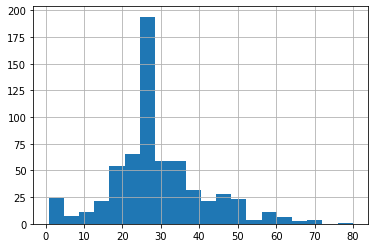

In [7]:
dftrain.age.hist(bins=20)
plt.show()


**Make some observations on the unfortundate :( data set**

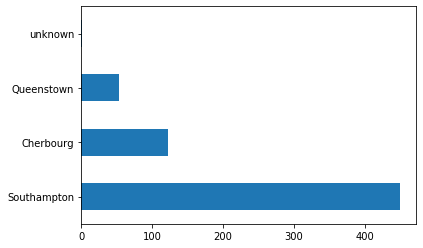

In [8]:
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()


**Survived passengers for each class**

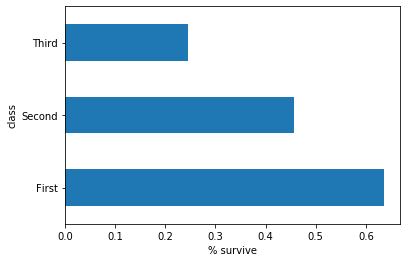

In [9]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


**Alright! lets get started! by now you must be wondering how to run learning algorithms on categorial features(we care only about numbers right!). Dataset has categorial features like embark_town, deck, class etc. These are strings but all the algorithms need numericals right. So, we have to change categorial features to numerical features. There are three different ways to do that, here we present one and the easiest way to do that**

In [10]:
dftrain.shape

(627, 9)

In [11]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [77]:
# Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=False)
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=False)
print(dftrain.shape)
print(dfeval.shape)

(627, 23)
(264, 22)


In [78]:
dftrain.head()

,age,n_siblings_spouses,parch,fare,sex_female,sex_male,class_First,class_Second,class_Third,deck_A,...,deck_E,deck_F,deck_G,deck_unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_unknown,alone_n,alone_y
0,22.0,1,0,7.2500,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,38.0,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,28.0,0,0,8.4583,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


**Here we are dropping one of the features to align training and evaluation datasets, you can use this to drop features you might consider unnecessary**

In [79]:
dftrain = dftrain.drop(columns="deck_G")

In [80]:
dftrain.shape

(627, 22)

In [81]:
dfeval.shape


(264, 22)

**Decision Tree Classification**

In [6]:
# Task 1: Implement a Decision tree classifier on the Dataset.
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


**Adaptive boosting for Decision Tree Classification**

In [26]:
# Task 2: Perform adaptive boosting for a decision tree classifier. Please play with the depth of the tree.
from sklearn.model_selection import ParameterGrid

param_grid = {'max_depth': [1, 2, 3, 5, 8, 10, 15, 20]}

best_score = 0
best_grid = []

for g in ParameterGrid(param_grid):
  model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=g['max_depth']),
                             n_estimators=50, learning_rate=1)
  model.fit(dftrain, y_train)
  y_pred = model.predict(dfeval)

  print("max_depth = %d, Accuracy: %f%%" % (g['max_depth'], metrics.accuracy_score(y_eval, y_pred)*100))


max_depth = 1, Accuracy: 77.651515%
max_depth = 2, Accuracy: 80.303030%
max_depth = 3, Accuracy: 75.757576%
max_depth = 5, Accuracy: 77.272727%
max_depth = 8, Accuracy: 79.545455%
max_depth = 10, Accuracy: 80.681818%
max_depth = 15, Accuracy: 82.954545%
max_depth = 20, Accuracy: 80.303030%


So the best model is with the max_depth of 15, and the best accuracy is `82.954545%`.

**Linear SVM classifier**

In [29]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Kernel=linear, accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Kernel=linear, accuracy: 75.37878787878788 %


In [9]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 68.93939393939394 %


In [10]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 64.77272727272727 %


In [ ]:
svclassifier = SVC(C=10, kernel='poly', degree=10, coef0=1.0)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Kernel=poly, accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Here I just simply tried the three kernel functions 'linear', 'rbf', 'poly' that sklearn library offers. And I found that if I use the default hyperparameters for 'rbf' and 'poly' as the kernel function, it will get a poor accuracy. So we need to tune the hyperparameters for these two kernels.

In [30]:
svc = SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.62121212121212 %


**Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

In [34]:
# Task 3: Using the SVM classifier on the dataset, play with different kernels and present your observations.
svclassifier = SVC(C=20, kernel='rbf')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Kernel=rbf, accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

svclassifier = SVC(C=10, gamma='scale', kernel='poly', degree=10, coef0=1.0, shrinking = True)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Kernel=poly, accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Kernel=rbf, accuracy: 76.89393939393939 %
Kernel=poly, accuracy: 78.03030303030303 %


In [27]:
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 68.93939393939394 %


Here I just simply tried the three kernel functions 'linear', 'rbf', 'poly' that sklearn library offers. And I found that if I use the default hyperparameters for 'rbf' and 'poly' as the kernel function, it will get a poor accuracy. So we need to tune the hyperparameters for these two kernels.

In [35]:
# Task 4: Apply Boosting to the SVM classifiers.
svc = SVC(C=20, kernel='rbf', probability=True)

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=90, base_estimator=svc, learning_rate=0.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 69.31818181818183 %


**It's all yours now, get the best possible accuracy in doing so understand the concepts we learnt in class. Hold on fellas, one more thing, don't push yourself so hard to get 100% though!**

Basically, we have two kinds of boosting solutions: one is with the decision tree as the weak learner, the other is to use SVM as the weak learner. So here I'm gonna explore both of these two ways to see which one can get a better performance.

### AdaBoost with Decision Tree

So my first attempt is like the following. I first split the training set into a training set and a validation set with the ratio of 9:1. Then I did a grid search. 

In [169]:
from sklearn.model_selection import train_test_split

# split into train & validation set
X_train, X_val, Y_train, Y_val = train_test_split(dftrain, y_train, test_size=0.1, random_state=1)

param_grid = parameters = {
    'max_depth' : [3, 5, 8], 
    'learning_rate' : [0.01, 0.1, 1], 
    'n_estimators' : [40, 80, 120]
}

best_score = 0
best_grid = {}
best_model = None

for g in ParameterGrid(param_grid):
    model = AdaBoostClassifier(
        DecisionTreeClassifier(
            max_depth=g['max_depth']
        ),
        n_estimators=g['n_estimators'], 
        learning_rate=g['learning_rate']
    )
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)

    val_accuracy_score = metrics.accuracy_score(Y_val, Y_pred)
    print("param = %s, training accuracy= %f%%, validation accuracy= %f%%" % 
          (g, model.score(X_train, Y_train)*100, val_accuracy_score*100))
    
    if best_score < val_accuracy_score:
        best_score = val_accuracy_score
        best_grid = g
        best_model = model

param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 40}, training accuracy= 83.333333%, validation accuracy= 82.539683%
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 80}, training accuracy= 84.219858%, validation accuracy= 80.952381%
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 120}, training accuracy= 84.397163%, validation accuracy= 80.952381%
param = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 40}, training accuracy= 94.503546%, validation accuracy= 80.952381%
param = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 80}, training accuracy= 96.099291%, validation accuracy= 80.952381%
param = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 120}, training accuracy= 96.985816%, validation accuracy= 80.952381%
param = {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 40}, training accuracy= 98.404255%, validation accuracy= 74.603175%
param = {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 80}, train

In [174]:
print("The best accuracy is: %f%%" % (best_score * 100))
print("The best parameter group is: %s" % best_grid)

The best accuracy is: 82.539683%
The best parameter group is: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 40}


In [175]:
y_eval = best_model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 89.39393939393939 %


Luckily, I get a test accuracy of 89.39%. But if we look at the validation accuracy, we can find that for the best group of parameters, we only get a training accuracy of 83.3% and a validation accuracy of 82.53%. It's less than the test accuracy. So maybe the reason for this success is only that we are too lucky.

### AdaBoost with SVM

Then I tried to use SVM as the AdaBoost's weak learner.

This time, before we feed the feature matrix into the model, I did a PCA and transformed the original 22-columns matrix into a 12-columns matrix so that some features with low effects on the prediction results would be removed.

In [3]:
from sklearn.decomposition import PCA

pca_mle = PCA(n_components=12)
pca_mle.fit(dftrain)
print(pca_mle.explained_variance_ratio_)

df_train = pca_mle.transform(dftrain)
df_eval = pca_mle.transform(dfeval)

[9.49632969e-01 4.91274677e-02 5.04102530e-04 1.85048060e-04
 1.28896029e-04 1.02393488e-04 9.55466267e-05 6.99356196e-05
 5.41536527e-05 3.06184955e-05 2.01227276e-05 1.46388133e-05]


In [8]:
# split into train & validation set
X_train, X_val, Y_train, Y_val = train_test_split(df_train, y_train, test_size=0.2, random_state=1)

param_grid = parameters = {
    'C': [1e-3, 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale', 0.5],
    'learning_rate': [1e-3, 1e-2, 0.1, 1], 
    'n_estimators': [50, 80]
 }

best_score = 0
best_grid = {}
best_model = None

for g in ParameterGrid(param_grid):
    model = AdaBoostClassifier(
        SVC(
            C=g['C'],
            kernel=g['kernel'],
            probability=True
        ),
        n_estimators=g['n_estimators'], 
        learning_rate=g['learning_rate']
    )
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    
    train_accuracy_score = model.score(X_train, Y_train)
    val_accuracy_score = metrics.accuracy_score(Y_val, Y_pred)
    
    print("param = %s, training accuracy= %f%%, validation accuracy= %f%%" % 
          (g, train_accuracy_score*100, val_accuracy_score*100))
    
    if best_score < val_accuracy_score:
        best_score = val_accuracy_score
        best_grid = g
        best_model = model

param = {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.001, 'n_estimators': 50}, training accuracy= 67.864271%, validation accuracy= 62.698413%
param = {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.001, 'n_estimators': 80}, training accuracy= 67.864271%, validation accuracy= 62.698413%
param = {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.01, 'n_estimators': 50}, training accuracy= 68.263473%, validation accuracy= 63.492063%
param = {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.01, 'n_estimators': 80}, training accuracy= 68.463074%, validation accuracy= 64.285714%
param = {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.1, 'n_estimators': 50}, training accuracy= 63.672655%, validation accuracy= 61.111111%
param = {'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.1, 'n_estimators': 80}, training accuracy= 61.876248%, validation accuracy= 58.730159%
param = {'C': 0.001, 'gamma'

param = {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.1, 'n_estimators': 50}, training accuracy= 63.473054%, validation accuracy= 61.111111%
param = {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 0.1, 'n_estimators': 80}, training accuracy= 65.269461%, validation accuracy= 61.904762%
param = {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 1, 'n_estimators': 50}, training accuracy= 66.866267%, validation accuracy= 65.079365%
param = {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'learning_rate': 1, 'n_estimators': 80}, training accuracy= 67.664671%, validation accuracy= 63.492063%
param = {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'learning_rate': 0.001, 'n_estimators': 50}, training accuracy= 67.864271%, validation accuracy= 62.698413%
param = {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'learning_rate': 0.001, 'n_estimators': 80}, training accuracy= 67.864271%, validation accuracy= 62.698413%
param = {'C': 0.1, 'gamma': 'scale', 'kernel

In [9]:
print("The best accuracy is: %f%%" % (best_score * 100))
print("The best parameter group is: %s" % best_grid)

The best accuracy is: 65.079365%
The best parameter group is: {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf', 'learning_rate': 1, 'n_estimators': 80}


In [11]:
y_pred = best_model.predict(df_eval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 68.56060606060606 %


The result is bad. From the training & validation accuracy, we can learn that the model is still underfitting. And I have tried several ways to improve that, but none of them works. So I just had to give up.

### Improve AdaBoost with Decision Tree

Then I just went back to the AdaBoost with Decision Tree model. I found that in the previous model, during the training process, when the training accuracy is almost around 99%, the validation accurracy is only about 70%. Based on this observation, the model might be overfitting in those cases.

Then, I did some research on how to prevent overfitting for decision trees, and the main idea is to tune the hyperparameter `min_samples_leaf` and `min_samples_split`, and also prevent the tree max depth from being too deep.

In [14]:
# split into train & validation set
X_train, X_val, Y_train, Y_val = train_test_split(dftrain, y_train, test_size=0.25, random_state=1)

param_grid = parameters = {
    'max_depth' : [3, 4, 5, 6, 8, 12], 
    'min_samples_leaf': [3, 5, 8, 10, 12],
    'min_samples_split': [3, 5, 10, 15],
    'learning_rate' : [1e-5, 1e-3, 0.01, 0.1, 1], 
    'n_estimators' : [50, 80, 100]
}

best_score = 0
best_grid = {}
best_model = None

for g in ParameterGrid(param_grid):
    model = AdaBoostClassifier(
        DecisionTreeClassifier(
            max_depth=g['max_depth'],
            min_samples_leaf=g['min_samples_leaf'],
            min_samples_split=g['min_samples_split'],
            random_state=30,
            splitter="random"
        ),
        n_estimators=g['n_estimators'], 
        learning_rate=g['learning_rate']
    )
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)

    train_accuracy_score = model.score(X_train, Y_train)
    val_accuracy_score = metrics.accuracy_score(Y_val, Y_pred)
    print("param = %s, training accuracy= %f%%, validation accuracy= %f%%" % 
          (g, model.score(X_train, Y_train)*100, val_accuracy_score*100))
    
    if train_accuracy_score > 0.92 and best_score < val_accuracy_score:
        best_score = val_accuracy_score
        best_grid = g
        best_model = model

param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 82.165605%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_

param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 81.702128%, validation accuracy= 82.165605%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 81.702128%, validation accuracy= 82.165605%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 81.702128%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 81.702128%, validation accuracy= 82.165605%
param = {'learning_rate': 1e-05, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split'

param = {'learning_rate': 1e-05, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split':

param = {'learning_rate': 1e-05, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 84.042553%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 84.255319%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 5, 

param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 86.595745%, validation accuracy= 84.076433%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 86.808511%, validation accuracy= 82.802548%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 86.595745%, validation accuracy= 82.802548%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 86.382979%, validation accuracy= 82.802548%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 85.744681%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3

param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_spl

param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_spl

param = {'learning_rate': 1e-05, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 83.191489%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 83.404255%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 83.191489%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 1e-05, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split'

param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 

param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 84.042553%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 84.255319%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 83.617021%, validation accuracy= 80.254777%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 83.617021%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 83.404255%, validation accuracy= 82.165605%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 

param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split':

param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 82.978723%, validation accuracy= 80.254777%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split':

param = {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 86.170213%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 82.978723%, validation accuracy= 80.254777%
param = {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.978723%, validation accuracy= 80.254777%
param = {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 5, '

param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 86.595745%, validation accuracy= 82.165605%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 87.872340%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 87.872340%, validation accuracy= 82.802548%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 87.021277%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 86.382979%, validation accuracy= 80.254777%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 

param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 90.425532%, validation accuracy= 83.439490%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_spl

param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 82.978723%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.001, 'max_depth': 12, 'min_samples_leaf': 10, 'min_sampl

param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_

param = {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 85.106383%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 83.404255%, validation accuracy= 80.891720%
param = {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 85.319149%, validation accuracy= 80.891720%
param = {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 85.319149%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 79.617834%
param = {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_

param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 91.276596%, validation accuracy= 83.439490%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 92.553191%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 88.085106%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 90.425532%, validation accuracy= 84.713376%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 90.425532%, validation accuracy= 83.439490%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_e

param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 82.340426%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 82.127660%, validation accuracy= 81.528662%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 10, 

param = {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 84.042553%, validation accuracy= 80.891720%
param = {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 83.404255%, validation accuracy= 80.254777%
param = {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 83.829787%, validation accuracy= 80.891720%
param = {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 82.765957%, validation accuracy= 80.891720%
param = {'learning_rate': 0.01, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10, 

param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 87.872340%, validation accuracy= 84.713376%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 84.893617%, validation accuracy= 79.617834%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 87.446809%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 87.234043%, validation accuracy= 82.802548%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 85.319149%, validation accuracy= 80.254777%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_est

param = {'learning_rate': 0.01, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 95.319149%, validation accuracy= 82.802548%
param = {'learning_rate': 0.01, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 90.851064%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 93.829787%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 94.680851%, validation accuracy= 84.076433%
param = {'learning_rate': 0.01, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 92.127660%, validation accuracy= 82.165605%
param = {'learning_rate': 0.01, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 10, 

param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 89.574468%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 87.659574%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 87.872340%, validation accuracy= 80.891720%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 89.361702%, validation accuracy= 80.891720%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 85.957447%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimator

param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 85.957447%, validation accuracy= 83.439490%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 84.893617%, validation accuracy= 84.076433%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 84.680851%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 86.170213%, validation accuracy= 82.802548%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 50}, training accuracy= 84.042553%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_est

param = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 88.723404%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 89.574468%, validation accuracy= 82.802548%
param = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 85.319149%, validation accuracy= 83.439490%
param = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 87.021277%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}, training accuracy= 88.723404%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_esti

param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 95.531915%, validation accuracy= 83.439490%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 90.212766%, validation accuracy= 83.439490%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 93.617021%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 94.042553%, validation accuracy= 79.617834%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 90.851064%, validation accuracy= 80.254777%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators

param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 97.021277%, validation accuracy= 80.891720%
param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 95.319149%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 96.382979%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 97.021277%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 94.468085%, validation accuracy= 80.891720%
param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators

param = {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 92.765957%, validation accuracy= 80.254777%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 98.085106%, validation accuracy= 79.617834%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 98.297872%, validation accuracy= 83.439490%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 98.297872%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 98.085106%, validation accuracy= 83.439490%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimator

param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 95.744681%, validation accuracy= 80.254777%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 91.702128%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 91.914894%, validation accuracy= 80.891720%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}, training accuracy= 94.893617%, validation accuracy= 82.165605%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 50}, training accuracy= 90.212766%, validation accuracy= 78.343949%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_esti

param = {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 97.234043%, validation accuracy= 81.528662%
param = {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 97.234043%, validation accuracy= 84.713376%
param = {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 97.659574%, validation accuracy= 82.802548%
param = {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 93.404255%, validation accuracy= 80.891720%
param = {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 95.744681%, validation accuracy= 79.617834%
param = {'learning_rate': 0.1, 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_

param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 96.170213%, validation accuracy= 80.254777%
param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 92.340426%, validation accuracy= 77.070064%
param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 95.319149%, validation accuracy= 78.980892%
param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 95.319149%, validation accuracy= 77.707006%
param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 91.489362%, validation accuracy= 78.980892%
param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 80}, t

param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 97.446809%, validation accuracy= 78.343949%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 97.234043%, validation accuracy= 77.707006%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 97.021277%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 97.659574%, validation accuracy= 77.070064%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 96.170213%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 80}, t

param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 95.957447%, validation accuracy= 80.254777%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 93.829787%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 95.319149%, validation accuracy= 78.343949%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 95.531915%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 97.234043%, validation accuracy= 78.980892%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 80

param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 97.872340%, validation accuracy= 75.159236%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 95.531915%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 97.234043%, validation accuracy= 80.891720%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 97.446809%, validation accuracy= 78.980892%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 95.106383%, validation accuracy= 78.343949%
param = {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 

param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 96.382979%, validation accuracy= 82.165605%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 98.297872%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 98.297872%, validation accuracy= 80.891720%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 97.234043%, validation accuracy= 78.980892%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 80}, training accuracy= 97.872340%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100},

param = {'learning_rate': 1, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 98.297872%, validation accuracy= 80.254777%
param = {'learning_rate': 1, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 97.872340%, validation accuracy= 80.254777%
param = {'learning_rate': 1, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 98.297872%, validation accuracy= 78.343949%
param = {'learning_rate': 1, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 98.936170%, validation accuracy= 80.254777%
param = {'learning_rate': 1, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 97.872340%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 80}, t

param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 98.723404%, validation accuracy= 78.980892%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 98.297872%, validation accuracy= 80.254777%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 98.936170%, validation accuracy= 81.528662%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 98.510638%, validation accuracy= 79.617834%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}, training accuracy= 98.085106%, validation accuracy= 82.802548%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 

param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 100}, training accuracy= 98.297872%, validation accuracy= 81.528662%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 50}, training accuracy= 97.446809%, validation accuracy= 80.891720%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 97.872340%, validation accuracy= 77.707006%
param = {'learning_rate': 1, 'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 15, 'n_estimators': 100}, training accuracy= 98.085106%, validation accuracy= 78.980892%


In [15]:
print("The best accuracy is: %f%%" % (best_score * 100))
print("The best parameter group is: %s" % best_grid)

The best accuracy is: 84.713376%
The best parameter group is: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}


In [16]:
y_pred = best_model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 81.43939393939394 %


This time we got a relatively good result 81.43%. And according to the training log, we can see that the training accuracy is 94.468085% while the validation accuracy is 84.713376% for our best parameter group. So I think this accuracy distribution is much more reasonable compared to the first 89.39% accuracy case.

Another way is to directedly test on the test set. But this way is kind of cheating and may not be correct.

In [42]:
param_grid = parameters = {
    'max_depth' : [3, 4, 5, 6, 8, 15], 
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [5, 10, 15],
    'learning_rate' : [1e-3, 0.01, 0.1, 1], 
    'n_estimators' : [40, 60, 80]
}

best_score = 0
best_grid = {}
best_model = None

for g in ParameterGrid(param_grid):
    model = AdaBoostClassifier(
        DecisionTreeClassifier(
            max_depth=g['max_depth'],
            min_samples_leaf=g['min_samples_leaf'],
            min_samples_split=g['min_samples_split'],
            random_state=30,
            splitter="random"
        ),
        n_estimators=g['n_estimators'], 
        learning_rate=g['learning_rate']
    )
    
    model.fit(dftrain, y_train)
    y_pred = model.predict(dfeval)

    accuracy_score = metrics.accuracy_score(y_eval, y_pred)
    print("param = %s, training accuracy= %f%%" % (g, model.score(dftrain, y_train)*100))
    
    if best_score < accuracy_score:
        best_score = accuracy_score
        best_grid = g
        best_model = model

param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 82.456140%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 82.615630%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 82.615630%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 82.615630%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 82.615630%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 82.775120%
param = {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 40

param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 87.081340%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 86.124402%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 85.964912%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 86.443381%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 84.688995%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 84.848485%
param = {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 

param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 90.749601%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 86.602871%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 87.878788%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 88.357257%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 87.240829%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 87.559809%
param = {'learning_rate': 0.001, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80

param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 82.296651%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 81.977671%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 82.296651%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 82.296651%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 81.977671%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 82.296651%
param = {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 80}, trai

param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 87.240829%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 86.124402%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 86.443381%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 86.602871%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 84.529506%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 86.602871%
param = {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}, tr

param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 91.706539%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 89.154705%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 90.271132%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 91.547049%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 83.253589%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 85.007974%
param = {'learning_rate': 0.01, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 80}, t

param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 86.602871%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 85.167464%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 84.848485%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 86.124402%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 84.688995%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 85.167464%
param = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 80}, train

param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 91.387560%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 87.240829%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 88.197767%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 89.952153%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 87.400319%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 88.995215%
param = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 80}, tr

param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 94.417863%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 91.387560%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 92.982456%
param = {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 94.258373%
param = {'learning_rate': 0.1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 97.926635%
param = {'learning_rate': 0.1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 98.245614%
param = {'learning_rate': 0.1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, trai

param = {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 91.228070%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 93.301435%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 95.693780%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 96.650718%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 93.460925%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 95.374801%
param = {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 96.81

param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy= 97.607656%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 40}, training accuracy= 96.810207%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 60}, training accuracy= 96.969697%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 97.767145%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 96.810207%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 97.448166%
param = {'learning_rate': 1, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 97.4

param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}, training accuracy= 97.926635%
param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 40}, training accuracy= 98.086124%
param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 60}, training accuracy= 98.245614%
param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 80}, training accuracy= 98.086124%
param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}, training accuracy= 97.767145%
param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 60}, training accuracy= 97.926635%
param = {'learning_rate': 1, 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}, training accuracy=

In [43]:
print("The best accuracy is: %f%%" % (best_score * 100))
print("The best parameter group is: %s" % best_grid)

The best accuracy is: 86.363636%
The best parameter group is: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 60}


In [44]:
y_pred = best_model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 86.36363636363636 %
